In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install pandas==2.0.3
!pip install numpy==1.24.4
!pip install matplotlib==3.8.0
!pip install tqdm==4.66.1
!pip install -U pip
!pip install -U setuptools wheel
!pip install torch==1.13.1+cpu torchvision==0.14.1+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
!pip install autogluon
!pip install ray==2.2.0

print('Colab 런타임 다시 시작 필요')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 36.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
    

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled torch-2.1.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.0+cu121
    Uninstalling torchvision-0.16.0+cu121:
      Successfully uninstalled torchvision-0.16.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1+cpu which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1+cpu which is incompatible.
torchtext 0.16.0 requires torch==2.1.0,

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: ray
    Found existing installation: ray 2.6.3
    Uninstalling ray-2.6.3:
      Successfully uninstalled ray-2.6.3
Colab 런타임 다시 시작 필요


In [1]:
import autogluon

In [2]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import os

#from IPython.display import display
#from tqdm.notebook import tqdm
#from matplotlib.dates import DayLocator, DateFormatter

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/index2.csv")

In [5]:
# 특정 열에 대해 NaN 값을 앞의 값으로 채우기
data['rv_h'].fillna(np.mean(data['rv_h']), inplace=True)
data['rv_d'].fillna(np.mean(data['rv_d']), inplace=True)
data['rv_w'].fillna(np.mean(data['rv_w']), inplace=True)


In [6]:
data.columns

Index(['Unnamed: 0', 'time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'returns', 'volatility', 'taker/maker_ratio', 'taker-maker_diffsum',
       'bbandup', 'bbandmid', 'bbandlow', 'rsi', 'cci', 'williumR', 'parabol',
       'adx', 'plusdi', 'plusdm', 'atr', 'FI', 'MFI', 'CDLDRAGONFLYDOJI',
       'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHIKKAKE',
       'CDLHIKKAKEMOD', 'CDLLONGLEGGEDDOJI', 'CDLRICKSHAWMAN', 'CDLTAKURI',
       'CDLTRISTAR', 'MACD', 'TRIX', '%K', '%D', 'Aroon_Oscillator',
       'Momentum', 'Awesome_Oscillator', 'AC', 'BOP', 'rv', 'rv_h', 'rv_d',
       'rv_w'],
      dtype='object')

In [ ]:
#generate data입니다.(Validation 시작)

In [88]:
#from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
#import matplotlib.pyplot as plt
#import pandas as pd

empty_df=pd.DataFrame()
def autog_make(data,column,start=0,predh=73,metric='MAPE',preset='best_quality',time_limits=300):
  df=data[['time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'returns', 'volatility', 'taker/maker_ratio', 'taker-maker_diffsum',
       'bbandup', 'bbandmid', 'bbandlow', 'rsi', 'cci', 'williumR', 'parabol',
       'adx', 'plusdi', 'plusdm', 'atr', 'FI', 'MFI', 'MACD', 'TRIX', '%K', '%D', 'Aroon_Oscillator',
       'Momentum', 'Awesome_Oscillator', 'AC', 'BOP', 'rv', 'rv_h', 'rv_d',
       'rv_w']]

  global empty_df

  # Modifying the DataFrame in-place
  df.rename(columns={'time': 'timestamp'}, inplace=True)

  # 'item_id' 열 추가
  df['item_id'] = 1  # 모든 행에 동일한 값 1을 설정
  tr=df.iloc[start:len(df)-predh]
  te=df.iloc[len(df)-predh:]

  tr=TimeSeriesDataFrame(tr)
  te=TimeSeriesDataFrame(te)

  predictor = TimeSeriesPredictor(
    prediction_length=predh,
    target=column,
    eval_metric=metric).fit(
    tr,
    time_limit=time_limits,

    ### you can change model###
    hyperparameters={
    #  'DeepAR' : {},
    #   'PatchTST' : {},
    #    'DLinear' : {},
    #     'TemporalFusionTransformer': {},
         'RecursiveTabularModel' : {
         },
    #    'DirectTabularModel' : {}
   },
    excluded_model_types=["WeightedEnsemble"],
    presets=preset,
    #refit_full= False,
    #num_val_windows = 72,
    #refit_every_n_windows = 1,

  )
  #예측하기
  pred=predictor.predict(tr)

  #train test 비교
  plt.plot(list(pred['mean']))
  plt.plot([te[column].iloc[i] for i in range(len(te))])

  #적재
  empty_df[column]=list(pred['mean'])


  return pred


In [89]:
#만들어야 하는 지표
making_lst=['Volume', 'taker/maker_ratio', 'taker-maker_diffsum',
        'rsi', 'cci', 'williumR', 'parabol',
       'adx', 'plusdi', 'plusdm', 'atr', 'FI', 'MFI', 'MACD', 'TRIX', '%K', '%D', 'Aroon_Oscillator',
       'Momentum', 'Awesome_Oscillator', 'AC', 'BOP', 'rv', 'rv_h', 'rv_d',
       'rv_w']

<ipython-input-88-6c42ac489a1f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'time': 'timestamp'}, inplace=True)
<ipython-input-88-6c42ac489a1f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_id'] = 1  # 모든 행에 동일한 값 1을 설정
Beginning AutoGluon training... Time limit = 300s
AutoGluon will save models to 'AutogluonModels/ag-20240203_064740'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_

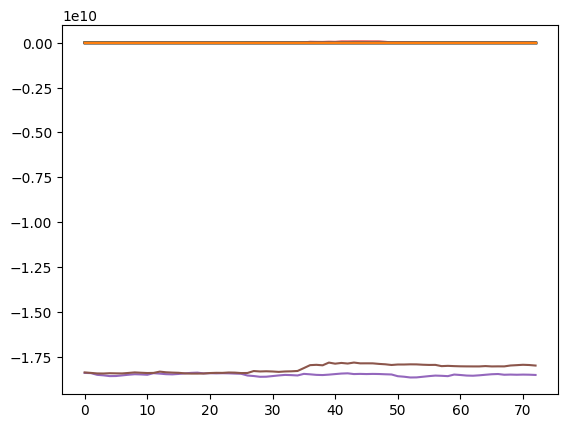

In [90]:
#지표생성
for i in making_lst:
  autog_make(data,column=i)

In [91]:
empty_df

,Volume,taker/maker_ratio,taker-maker_diffsum,rsi,cci,williumR,parabol,adx,plusdi,plusdm,...,%D,Aroon_Oscillator,Momentum,Awesome_Oscillator,AC,BOP,rv,rv_h,rv_d,rv_w
0,17292.243225,1.123264,-1.839837e+10,56.698323,-15.866757,-20.875800,74093.234338,18.157619,23.394030,943.406750,...,47.448132,-56.211494,756.917654,-39.145747,255.531666,12823.864602,1.069669e-04,3.969025e-05,0.000030,0.000021
1,19913.360413,1.098334,-1.840940e+10,60.748171,10.889907,-16.540755,143741.761465,17.060212,22.783065,799.861667,...,49.737320,6.092504,1280.288831,160.555360,91.124639,11444.598464,4.872949e-05,1.069689e-04,0.000033,0.000022
2,14061.686585,0.817100,-1.850609e+10,51.691638,-49.762769,-35.427809,103486.542123,16.813276,20.284434,661.305554,...,49.663133,2.784083,525.102237,308.897222,20.805824,-12638.608010,9.593921e-05,4.884568e-05,0.000032,0.000022
3,6598.506409,0.999087,-1.853435e+10,51.671628,-62.860928,-34.259230,50521.405665,16.289571,19.359106,617.574917,...,48.408711,-1.340519,389.284207,450.101950,-6.963670,218.366829,5.391063e-07,9.528463e-05,0.000037,0.000022
4,9232.149475,0.860165,-1.857678e+10,48.378473,-80.304361,-38.541126,35033.177505,16.006557,18.530056,575.211232,...,46.519799,7.880878,149.984204,502.210202,50.981159,-5756.788393,1.348135e-05,6.553024e-07,0.000035,0.000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,6315.014446,1.066123,-1.849154e+10,46.072430,-98.772167,-74.565589,30343.053643,26.944456,18.912792,505.741351,...,47.805821,20.013583,-199.603000,20.172574,252.781082,1689.287869,2.575459e-06,8.657061e-05,0.000024,0.000023
69,14998.118450,1.019940,-1.850074e+10,41.459094,-67.927089,-91.039301,56653.699292,25.765616,20.704713,647.241783,...,42.692853,-67.846018,-761.510695,-48.622424,307.173086,-5774.553333,4.157925e-05,2.221097e-06,0.000024,0.000023
70,7791.019329,1.025165,-1.849263e+10,48.131737,-32.962975,-68.455147,34863.166924,24.223308,19.620895,628.361047,...,41.963672,-63.260780,-352.444830,-129.447425,354.565757,5745.569084,3.644726e-05,4.111065e-05,0.000026,0.000023
71,4301.783489,0.976039,-1.849839e+10,51.578419,24.835966,-60.311920,12542.342084,23.467853,22.154042,738.347480,...,42.117758,-54.455053,-103.244818,-186.807418,370.713053,3147.032435,6.088459e-06,3.597866e-05,0.000027,0.000024


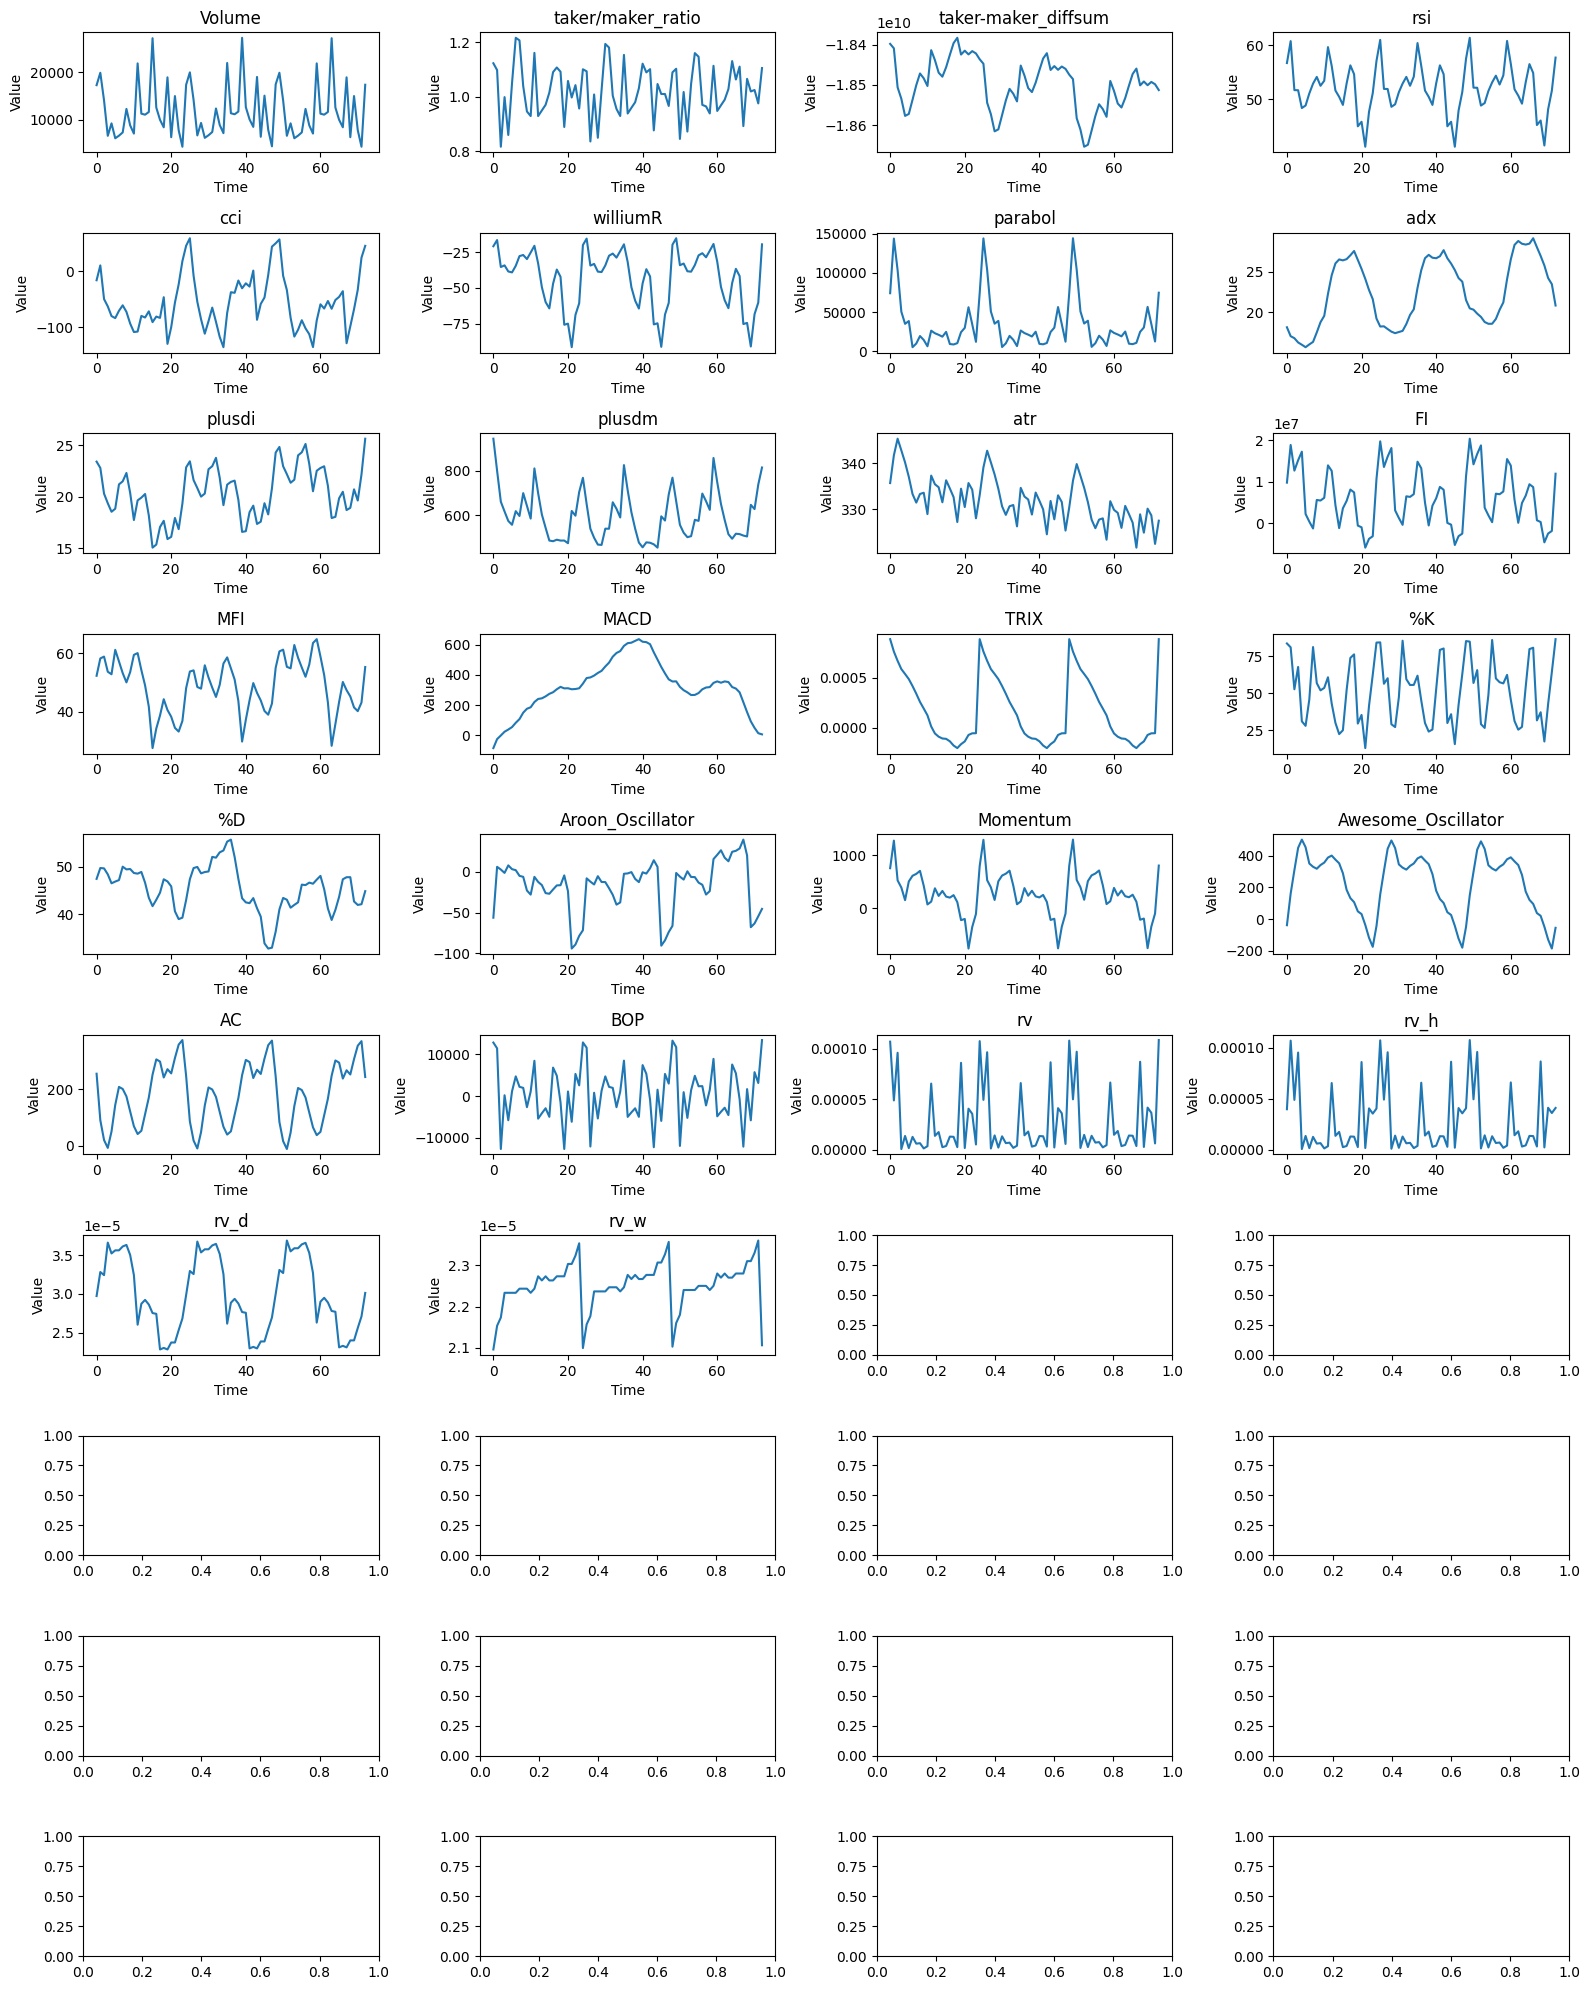

In [92]:
# 4x8의 서브플롯 생성
fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(16, 20))

# 데이터프레임의 모든 열에 대해 라인 플롯 그리기
for i, column in enumerate(empty_df.columns):
    row = i // 4
    col = i % 4
    axs[row, col].plot(empty_df.index, empty_df[column], label=column)
    axs[row, col].set_title(column)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Value')
    #axs[row, col].legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [93]:
empty_df.to_csv("gen_data_valid.csv")

In [105]:
train_data=data[list(empty_df.columns)].iloc[:-73]

In [106]:
# 행으로 합치기(xtrain과 생성된 xtest)
selected_data = pd.concat([train_data, empty_df], ignore_index=True);selected_data

,Volume,taker/maker_ratio,taker-maker_diffsum,rsi,cci,williumR,parabol,adx,plusdi,plusdm,...,%D,Aroon_Oscillator,Momentum,Awesome_Oscillator,AC,BOP,rv,rv_h,rv_d,rv_w
0,4299.783000,0.861135,-2.211825e+07,46.214262,-21.456233,-66.403402,35.538400,16.904644,18.975350,101.659882,...,43.528752,-55.000000,2.500000,-18.965000,7.704000,-2216.187714,4.840000e-07,2.196910e-05,0.000022,0.000022
1,14283.553000,1.208955,4.494365e+05,55.036042,87.921893,-41.798299,204.178400,17.271726,27.121704,155.998462,...,45.158317,-55.000000,25.300000,-9.770000,7.858000,7445.095193,5.910000e-06,4.840000e-07,0.000022,0.000022
2,10777.263000,1.258681,2.109458e+07,60.678232,166.128032,-21.810450,690.524000,18.041115,27.983865,164.655714,...,49.453631,-55.000000,111.700000,3.810000,6.252000,6529.870215,3.880000e-06,5.910000e-06,0.000022,0.000022
3,40719.495000,1.230562,9.185839e+07,74.151418,292.240779,-5.228031,5210.666400,20.475941,39.730538,273.094592,...,53.227764,50.000000,229.900000,34.330000,-4.774000,36618.666430,5.750000e-05,3.880000e-06,0.000022,0.000022
4,20900.843000,0.851541,6.359019e+07,73.404367,232.564806,-17.099638,6730.788000,23.056616,41.043242,287.987835,...,57.846384,55.000000,214.700000,64.250000,-18.258000,-1153.832027,4.310000e-08,5.750000e-05,0.000022,0.000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9331,6315.014446,1.066123,-1.849154e+10,46.072430,-98.772167,-74.565589,30343.053643,26.944456,18.912792,505.741351,...,47.805821,20.013583,-199.603000,20.172574,252.781082,1689.287869,2.575459e-06,8.657061e-05,0.000024,0.000023
9332,14998.118450,1.019940,-1.850074e+10,41.459094,-67.927089,-91.039301,56653.699292,25.765616,20.704713,647.241783,...,42.692853,-67.846018,-761.510695,-48.622424,307.173086,-5774.553333,4.157925e-05,2.221097e-06,0.000024,0.000023
9333,7791.019329,1.025165,-1.849263e+10,48.131737,-32.962975,-68.455147,34863.166924,24.223308,19.620895,628.361047,...,41.963672,-63.260780,-352.444830,-129.447425,354.565757,5745.569084,3.644726e-05,4.111065e-05,0.000026,0.000023
9334,4301.783489,0.976039,-1.849839e+10,51.578419,24.835966,-60.311920,12542.342084,23.467853,22.154042,738.347480,...,42.117758,-54.455053,-103.244818,-186.807418,370.713053,3147.032435,6.088459e-06,3.597866e-05,0.000027,0.000024


In [ ]:
##here for validation##

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss=StandardScaler()
ss_selected=ss.fit_transform(selected_data)
ss_selected=pd.DataFrame(ss_selected,columns=empty_df.columns)
xtrain=ss_selected.iloc[:-73,:]
xtest=ss_selected.iloc[-73:]

In [108]:
ytrain=data['returns'].iloc[:-73]
ytest=data['returns'].iloc[-73:]

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

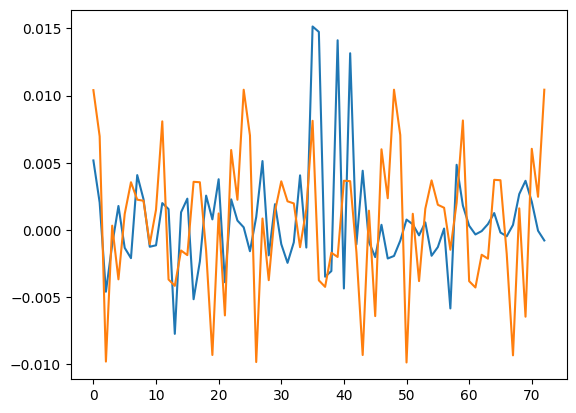

In [126]:
plt.plot(np.array(ytest))
plt.plot(ypred)

In [ ]:
#compute volatility

([<matplotlib.axis.XTick at 0x7c2e704a5b70>,
 [Text(0, 0, 'Volume'),
  Text(1, 0, 'taker/maker_ratio'),
  Text(2, 0, 'taker-maker_diffsum'),
  Text(3, 0, 'rsi'),
  Text(4, 0, 'cci'),
  Text(5, 0, 'williumR'),
  Text(6, 0, 'parabol'),
  Text(7, 0, 'adx'),
  Text(8, 0, 'plusdi'),
  Text(9, 0, 'plusdm'),
  Text(10, 0, 'atr'),
  Text(11, 0, 'FI'),
  Text(12, 0, 'MFI'),
  Text(13, 0, 'MACD'),
  Text(14, 0, 'TRIX'),
  Text(15, 0, '%K'),
  Text(16, 0, '%D'),
  Text(17, 0, 'Aroon_Oscillator'),
  Text(18, 0, 'Momentum'),
  Text(19, 0, 'Awesome_Oscillator'),
  Text(20, 0, 'AC'),
  Text(21, 0, 'BOP'),
  Text(22, 0, 'rv'),
  Text(23, 0, 'rv_h'),
  Text(24, 0, 'rv_d'),
  Text(25, 0, 'rv_w')])

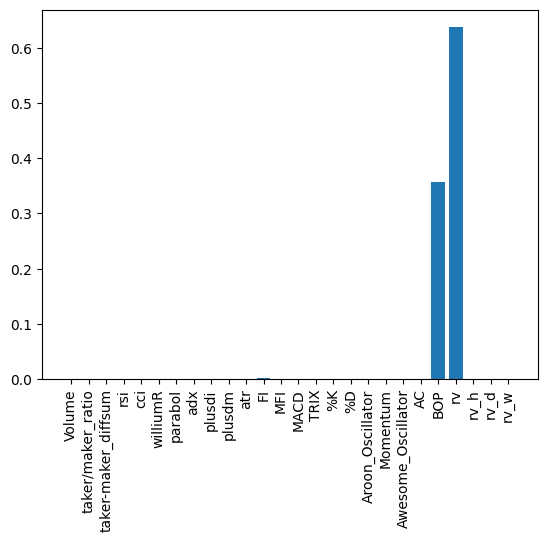

In [213]:
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.xticks(range(len(empty_df.columns)),empty_df.columns, rotation='vertical')

In [187]:
true_volat=list(data['volatility'].iloc[-73:])

In [197]:
# 예측한 volatility + 이전 ytrain
return_df = pd.concat([ytrain,pd.Series(ypred)], ignore_index=True)
return_df=pd.DataFrame(return_df,columns=['returns'])

In [198]:
# Calculate the rolling standard deviation of returns
return_df['volatility'] = return_df['returns'].rolling(window=20).std()

In [199]:
expected_volat=list(return_df['volatility'].iloc[-73:])

In [200]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(true_volat, expected_volat)

0.5015011238265852

In [ ]:
###모델 재학습(without two variable)

In [208]:
empty_df.columns

Index(['Volume', 'taker/maker_ratio', 'taker-maker_diffsum', 'rsi', 'cci',
       'williumR', 'parabol', 'adx', 'plusdi', 'plusdm', 'atr', 'FI', 'MFI',
       'MACD', 'TRIX', '%K', '%D', 'Aroon_Oscillator', 'Momentum',
       'Awesome_Oscillator', 'AC', 'BOP', 'rv', 'rv_h', 'rv_d', 'rv_w'],
      dtype='object')

In [ ]:
# 행으로 합치기(xtrain과 생성된 xtest)
selected_data = pd.concat([train_data, empty_df], ignore_index=True);selected_data

In [222]:
def re_train(data,empty_df,excluded_column=["BOP",'rv']):
  filtered_columns = [col for col in empty_df.columns if col not in excluded_column]
  train_data=data[filtered_columns].iloc[:-73]
  selected_data = pd.concat([train_data, empty_df[filtered_columns]], ignore_index=True)

  from sklearn.preprocessing import StandardScaler
  from sklearn.model_selection import train_test_split

  ss=StandardScaler()
  ss_selected=ss.fit_transform(selected_data)
  ss_selected=pd.DataFrame(ss_selected,columns=filtered_columns)
  xtrain=ss_selected.iloc[:-73,:]
  xtest=ss_selected.iloc[-73:]

  ytrain=data['returns'].iloc[:-73]
  ytest=data['returns'].iloc[-73:]

  from sklearn.ensemble import RandomForestRegressor
  rf=RandomForestRegressor()
  rf.fit(xtrain,ytrain)
  ypred=rf.predict(xtest)

  plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
  plt.xticks(range(len(filtered_columns)),filtered_columns, rotation='vertical')

  true_volat=list(data['volatility'].iloc[-73:])
  # 예측한 volatility + 이전 ytrain
  return_df = pd.concat([ytrain,pd.Series(ypred)], ignore_index=True)
  return_df=pd.DataFrame(return_df,columns=['returns'])

  # Calculate the rolling standard deviation of returns
  return_df['volatility'] = return_df['returns'].rolling(window=20).std()
  expected_volat=list(return_df['volatility'].iloc[-73:])

  from sklearn.metrics import mean_absolute_percentage_error
  print(mean_absolute_percentage_error(true_volat, expected_volat))
  return expected_volat

In [225]:
mean_absolute_percentage_error(true_volat,expected_volat2)

0.26290796923003923

0.26290796923003923


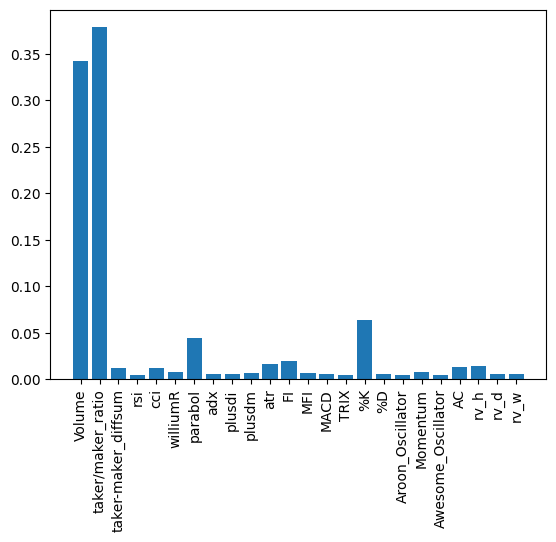

In [223]:
expected_volat2=re_train(data,empty_df,excluded_column=["BOP",'rv'])

In [229]:
mean_absolute_percentage_error(true_volat,(np.array(expected_volat)+np.array(expected_volat2))/2)

0.36865478252143213

In [ ]:
####Validation 종료####

In [ ]:
#test 없이 그냥 생성하기
#from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
#import matplotlib.pyplot as plt
#import pandas as pd
empty_df=pd.DataFrame()
def autog_make_only(data,column,start=0,predh=73,metric='MAPE',preset='best_quality',time_limits=300):
  df=data[['time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'returns', 'volatility', 'taker/maker_ratio', 'taker-maker_diffsum',
       'bbandup', 'bbandmid', 'bbandlow', 'rsi', 'cci', 'williumR', 'parabol',
       'adx', 'plusdi', 'plusdm', 'atr', 'FI', 'MFI', 'MACD', 'TRIX', '%K', '%D', 'Aroon_Oscillator',
       'Momentum', 'Awesome_Oscillator', 'AC', 'BOP', 'rv', 'rv_h', 'rv_d',
       'rv_w']]

  global empty_df

  # Modifying the DataFrame in-place
  df.rename(columns={'time': 'timestamp'}, inplace=True)

  # 'item_id' 열 추가
  df['item_id'] = 1  # 모든 행에 동일한 값 1을 설정
  tr=df.iloc[start:len(df)]


  tr=TimeSeriesDataFrame(tr)


  predictor = TimeSeriesPredictor(
    prediction_length=predh,
    target=column,

    eval_metric=metric,).fit(
    tr,
    enable_ensemble=False,
    time_limit=time_limits,
    ## you can change model###
    hyperparameters={
    "RecursiveTabularModel": {
    # 'refit_every_n_windows': 20,
    # 'refit_full': False,

    },
   #"DeepAR" : {},
   },
    presets=preset,
  )
  #예측하기
  pred=predictor.predict(tr)

  #train test 비교
  #plt.plot(list(pred['mean']))
  #plt.plot([te[column].iloc[i] for i in range(len(te))])

  #적재
  empty_df[column]=list(pred['mean'])

  return pred

In [ ]:
#here for get real expectation(after 1/28)

In [44]:
# 행으로 합치기
tr_df = pd.concat([selected_data, empty_df], ignore_index=True);tr_df

,Volume,taker/maker_ratio,taker-maker_diffsum,rsi,cci,williumR,parabol,adx,plusdi,plusdm,...,%D,Aroon_Oscillator,Momentum,Awesome_Oscillator,AC,BOP,rv,rv_h,rv_d,rv_w
0,4299.783000,0.861135,-2.211825e+07,46.214262,-21.456233,-66.403402,35.538400,16.904644,18.975350,101.659882,...,43.528752,-55.000000,2.500000,-18.965000,7.704000,-2216.187714,4.840000e-07,2.196910e-05,0.000022,0.000022
1,14283.553000,1.208955,4.494365e+05,55.036042,87.921893,-41.798299,204.178400,17.271726,27.121704,155.998462,...,45.158317,-55.000000,25.300000,-9.770000,7.858000,7445.095193,5.910000e-06,4.840000e-07,0.000022,0.000022
2,10777.263000,1.258681,2.109458e+07,60.678232,166.128032,-21.810450,690.524000,18.041115,27.983865,164.655714,...,49.453631,-55.000000,111.700000,3.810000,6.252000,6529.870215,3.880000e-06,5.910000e-06,0.000022,0.000022
3,40719.495000,1.230562,9.185839e+07,74.151418,292.240779,-5.228031,5210.666400,20.475941,39.730538,273.094592,...,53.227764,50.000000,229.900000,34.330000,-4.774000,36618.666430,5.750000e-05,3.880000e-06,0.000022,0.000022
4,20900.843000,0.851541,6.359019e+07,73.404367,232.564806,-17.099638,6730.788000,23.056616,41.043242,287.987835,...,57.846384,55.000000,214.700000,64.250000,-18.258000,-1153.832027,4.310000e-08,5.750000e-05,0.000022,0.000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9404,13023.108779,1.113996,-1.808479e+10,70.936549,59.883528,-1.944411,10677.326883,31.399842,42.274380,737.669835,...,61.242646,44.877230,377.505432,730.221179,111.779123,361.585183,1.444880e-05,8.152153e-06,0.000004,0.000021
9405,13191.454577,1.129494,-1.806404e+10,71.429437,72.968807,-1.305418,14267.875854,32.734334,43.085099,785.325963,...,65.672620,49.877230,445.025881,806.393106,126.073429,2625.616472,5.448796e-06,1.443215e-05,0.000004,0.000021
9406,12527.635762,0.933693,-1.807748e+10,70.919962,81.685422,-4.510986,12493.461736,34.046179,42.720980,755.478062,...,72.111287,54.877230,466.326651,805.913288,158.279087,-1104.777895,1.052316e-06,5.432153e-06,0.000004,0.000021
9407,11398.936416,0.817186,-1.810767e+10,68.198995,42.967737,-13.148687,6049.324661,35.097644,40.909867,706.262181,...,73.092924,54.877230,432.242715,792.767089,185.334953,721.151036,1.665796e-06,1.035673e-06,0.000004,0.000021


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss=StandardScaler()
ss_train=ss.fit_transform(tr_df)
ss_train=pd.DataFrame(ss_train,columns=empty_df.columns)
ss_train_data=ss_train.iloc[:-73,:]
ss_test_data=ss_train.iloc[-73:]
y_train=data['returns']



In [59]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(ss_train_data,y_train)
pred=rf.predict(ss_test_data)


In [73]:
ss_train.columns

Index(['Volume', 'taker/maker_ratio', 'taker-maker_diffsum', 'rsi', 'cci',
       'williumR', 'parabol', 'adx', 'plusdi', 'plusdm', 'atr', 'FI', 'MFI',
       'MACD', 'TRIX', '%K', '%D', 'Aroon_Oscillator', 'Momentum',
       'Awesome_Oscillator', 'AC', 'BOP', 'rv', 'rv_h', 'rv_d', 'rv_w'],
      dtype='object')

In [74]:
len(ss_train.columns)

26

<BarContainer object of 26 artists>

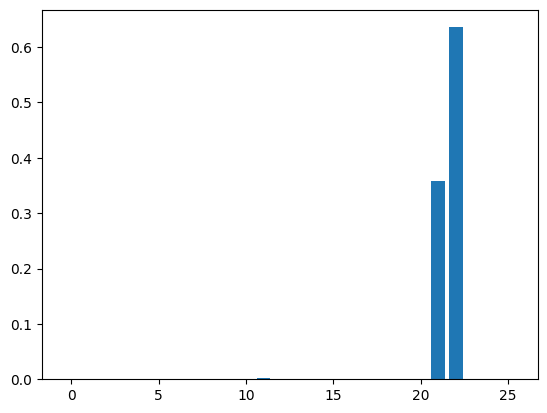

In [72]:
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)

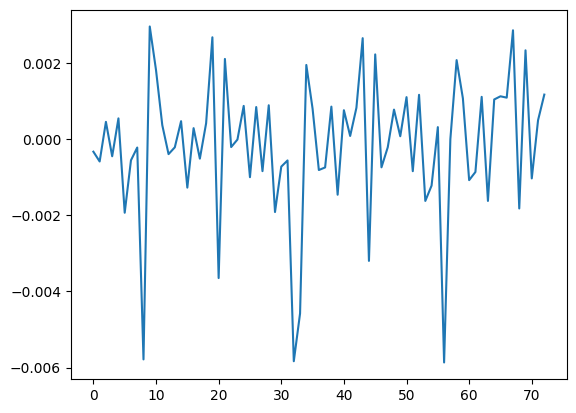

In [60]:
plt.plot(pred)